In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('fulldata_.csv', encoding='cp949', low_memory=False)

In [3]:
print(data.columns.values)

['번호' '개방서비스명' '개방서비스아이디' '개방자치단체코드' '관리번호' '인허가일자' '인허가취소일자' '영업상태구분코드'
 '영업상태명' '상세영업상태코드' '상세영업상태명' '폐업일자' '휴업시작일자' '휴업종료일자' '재개업일자' '소재지전화'
 '소재지면적' '소재지우편번호' '소재지전체주소' '도로명전체주소' '도로명우편번호' '사업장명' '최종수정시점' '데이터갱신구분'
 '데이터갱신일자' '업태구분명' '좌표정보x(epsg5174)' '좌표정보y(epsg5174)' '위생업태명' '남성종사자수'
 '여성종사자수' '영업장주변구분명' '등급구분명' '급수시설구분명' '총직원수' '본사직원수' '공장사무직직원수'
 '공장판매직직원수' '공장생산직직원수' '건물소유구분명' '보증액' '월세액' '다중이용업소여부' '시설총규모' '전통업소지정번호'
 '전통업소주된음식' '홈페이지' 'Unnamed: 47']


In [27]:
data_1 = data[['영업상태명', '사업장명', '도로명전체주소', '홈페이지', '소재지전화']]
data_1

,영업상태명,사업장명,도로명전체주소,홈페이지,소재지전화
0,폐업,팥붕슈붕,"인천광역시 중구 영종해안남로321번길 186, 파라다이스시티 플라자 1층 (운서동)",NaN,NaN
1,폐업,헤이븐(haven),"서울특별시 금천구 가산디지털1로 100, 1층 117호 (가산동)",NaN,NaN
2,폐업,리은푸드,"대구광역시 중구 달구벌대로 2077, 현대백화점 지하1층 (계산동2가)",NaN,NaN
3,폐업,(주)파파밸리,"경기도 하남시 미사대로 750, 신세계백화점 스타필드 하남 지하1층 (신장동)",NaN,NaN
4,폐업,이안만두,"경기도 하남시 미사대로 750, 스타필드 하남 신세계백화점 지하2층 일부호 (신장동)",NaN,NaN
...,...,...,...,...,...
602902,영업/정상,GS25HR아팰리스점,"광주광역시 남구 제석로 104, 201동 1층 102호 (봉선동)",NaN,062 673 8482
602903,영업/정상,석류나무,"광주광역시 남구 독립로 30-3, 1층 (백운동)",NaN,062 651 8001
602904,영업/정상,블랑PC토랑,"광주광역시 남구 서문대로 700, 광동빌딩 2층 (진월동)",NaN,NaN
602905,영업/정상,아틀리에pc,"광주광역시 남구 월산로151번길 10, 땡큐pc방 1층 (월산동)",NaN,NaN


In [32]:
# 도로명전체주소 기준 값 NA 행 삭제
data_1 = data_1.dropna(subset=['도로명전체주소'])
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148775 entries, 20 to 602906
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   영업상태명    148775 non-null  object 
 1   사업장명     148775 non-null  object 
 2   도로명전체주소  148775 non-null  object 
 3   홈페이지     0 non-null       float64
 4   소재지전화    148775 non-null  object 
dtypes: float64(1), object(4)
memory usage: 6.8+ MB


In [33]:
data_2 = data_1[data_1['도로명전체주소'].str.contains('경기도')]
data_2.head()

,영업상태명,사업장명,도로명전체주소,홈페이지,소재지전화
93,폐업,(주)제이와이에스유통,"경기도 수원시 영통구 광교중앙로 124, 갤러리아 광교 지1층 (하동)",NaN,031 2685468
130,폐업,(주)제이와이에스유통,"경기도 부천시 원미구 길주로 300, LOTTE백화점, 지하1층 행사일부호 (중동)",NaN,031 268 5468
221,폐업,리은푸드,"경기도 수원시 영통구 광교중앙로 124, 갤러리아 광교 지1층 (하동)",NaN,053 7105108
368,폐업,(주)지오에프앤비,"경기도 수원시 영통구 광교중앙로 124, 갤러리아 광교 지하1층 (하동)",NaN,0222816340
633,폐업,리은푸드,경기도 용인시 수지구 포은대로 536 (주)신세계 사우스시티 지하2층 일부호 (죽전동),NaN,053 7105108


In [34]:
data_3 = data_2[data_2['영업상태명'] != '폐업']
data_3.head()

,영업상태명,사업장명,도로명전체주소,홈페이지,소재지전화
402553,영업/정상,버거킹 원당성사캠퍼스점,"경기도 고양시 덕양구 고양대로 1415, 1층 B113, B114(일부)호 (성사동)",NaN,0263318460
402655,영업/정상,텐퍼센트커피 성남시청점,"경기도 성남시 중원구 성남대로997번길 25-9, 1층 일부호 (여수동)",NaN,070 43357692
402689,영업/정상,달임,"경기도 고양시 덕양구 혜음로 30, 103동 123(일부)호 (고양동, 삼성아파트)",NaN,031 9698082
402764,영업/정상,라크루뜨 서울 현대백화점 중동점,"경기도 부천시 원미구 길주로 180, 지하1층 일부(현대백화점 중동점 백화점) (중동)",NaN,02 69053030
402774,영업/정상,탐앤탐스 평택호휴게소점,"경기도 평택시 현덕면 평택호3길 63, 평택호 휴게소 주건축물제1동 1층",NaN,031 3223264


In [39]:
data_3.loc[:, '경기도 내 행정구역'] = data_3['도로명전체주소'].str.split().str[1]
data_3.head()

C:\Users\User\AppData\Local\Temp\ipykernel_19148\3027812575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3.loc[:, '경기도 내 행정구역'] = data_3['도로명전체주소'].str.split().str[1]


,영업상태명,사업장명,도로명전체주소,홈페이지,소재지전화,도시명,경기도 내 행정단위,경기도 내 행정구역
402553,영업/정상,버거킹 원당성사캠퍼스점,"경기도 고양시 덕양구 고양대로 1415, 1층 B113, B114(일부)호 (성사동)",NaN,0263318460,고양시,고양시,고양시
402655,영업/정상,텐퍼센트커피 성남시청점,"경기도 성남시 중원구 성남대로997번길 25-9, 1층 일부호 (여수동)",NaN,070 43357692,성남시,성남시,성남시
402689,영업/정상,달임,"경기도 고양시 덕양구 혜음로 30, 103동 123(일부)호 (고양동, 삼성아파트)",NaN,031 9698082,고양시,고양시,고양시
402764,영업/정상,라크루뜨 서울 현대백화점 중동점,"경기도 부천시 원미구 길주로 180, 지하1층 일부(현대백화점 중동점 백화점) (중동)",NaN,02 69053030,부천시,부천시,부천시
402774,영업/정상,탐앤탐스 평택호휴게소점,"경기도 평택시 현덕면 평택호3길 63, 평택호 휴게소 주건축물제1동 1층",NaN,031 3223264,평택시,평택시,평택시


In [41]:
data_4 = data_3.groupby('경기도 내 행정구역').size().reset_index(name='사업장 수')
data_4

,경기도 내 행정구역,사업장 수
0,가평군,123
1,고양시,916
2,과천시,121
3,광명시,232
4,광주시,336
5,구리시,150
6,군포시,310
7,김포시,424
8,남양주시,470
9,동두천시,78


In [43]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [45]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

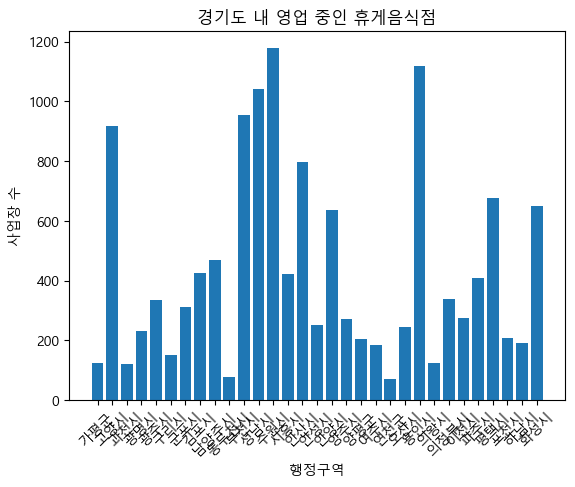

In [46]:
plt.bar(data_4['경기도 내 행정구역'], data_4['사업장 수'])
plt.xticks(rotation=45)
plt.title('경기도 내 영업 중인 휴게음식점')
plt.xlabel('행정구역')
plt.ylabel('사업장 수')

plt.show()